In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np
import statistics
import math
import random
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import seaborn as sn
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten           
from matplotlib import colors                                                                                             






data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")
# print(data)

x5 = data['famhist']

x5_enc = pd.get_dummies(x5)

y = data['chd']


#manipulation for one hot encoding to be able to use it as a varib
temp_arr = x5_enc['Absent']
temp_arr2 = x5_enc['Present']
new_arr = []
for i in range(len(temp_arr)):
    if temp_arr[i] == 0:
        new_arr.append(1)
    else:
        new_arr.append(2)

x5 = new_arr

data['famhist'] = x5 
# print (data)
del data['chd']

In [2]:
#Part A
X_train, X_test, y_train, y_test = train_test_split(data, list(y), test_size=0.5, random_state=42)

km = KMeans(n_clusters=2, random_state=42)
km.fit(X_train,y_train)
y_predict = km.predict(X_test)

# print(y_predict)
# print(len(y_test))

counter = 0
for i in range(len(y_predict)):
    if y_predict[i] == y_test[i]:
        counter+=1
accu = counter / len(y_predict)
print (accu)


0.5324675324675324


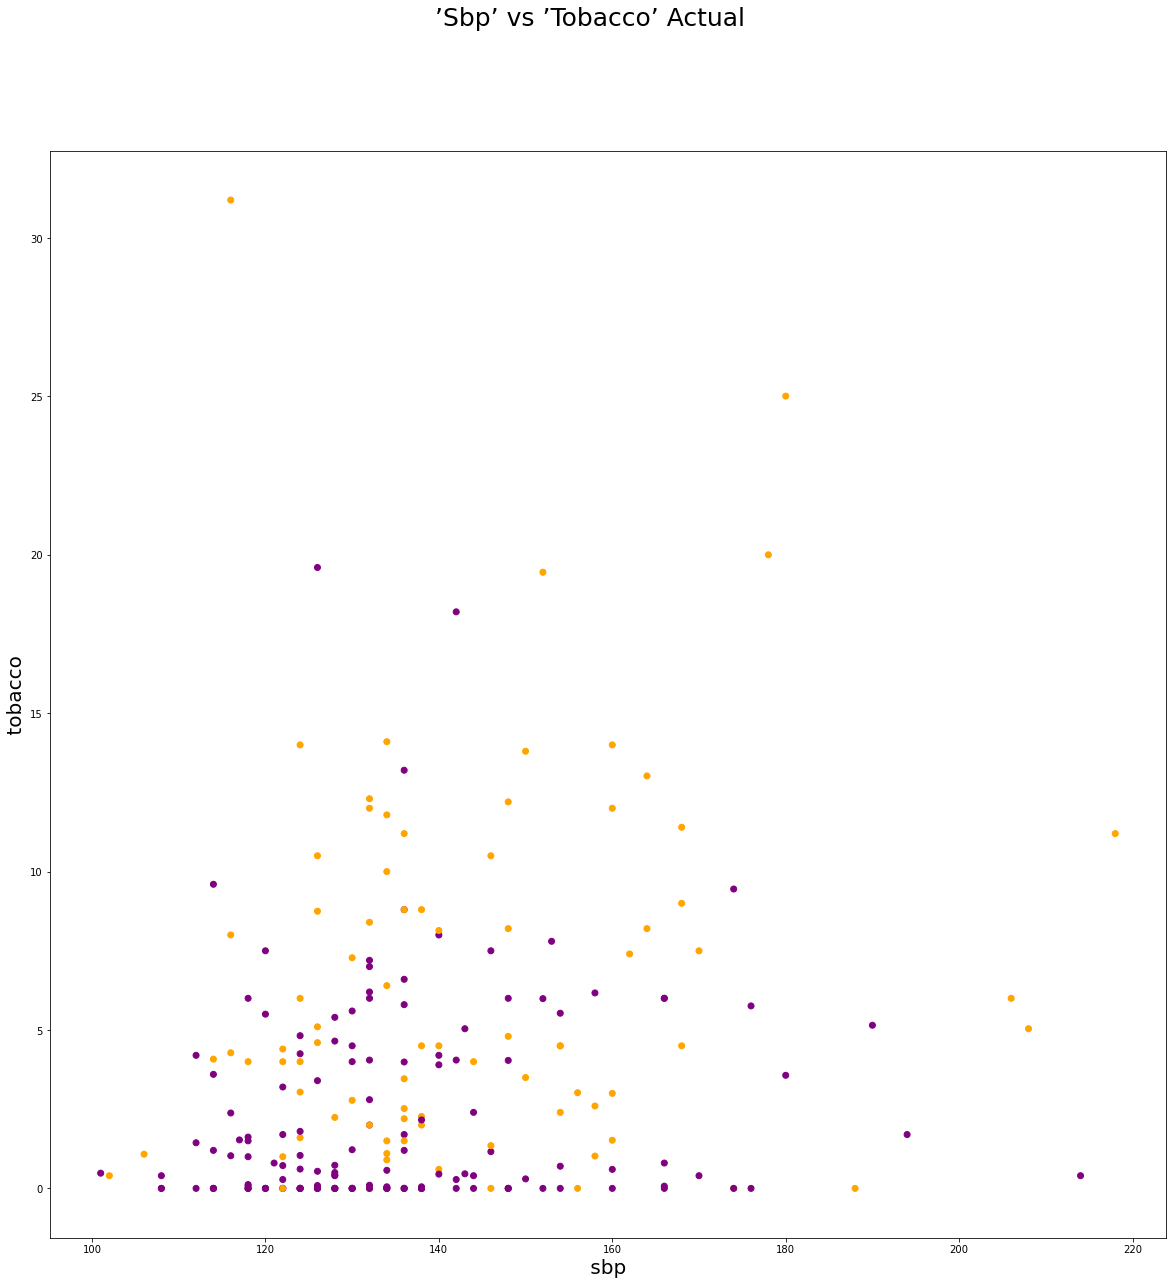

In [9]:
fig1 = plt.figure(1, figsize=(20,20))
fig1.suptitle(" ’Sbp’ vs ’Tobacco’ Actual ", fontsize=25)
chart1 = fig1.add_subplot()
chart1.scatter(X_test['sbp'], X_test['tobacco'], c= y_test ,cmap= colors.ListedColormap(['purple', 'orange']))
# chart1.scatter([x for x in range(len(y))],y)
plt.xlabel(" sbp ", fontsize=20)
plt.ylabel(" tobacco ", fontsize=20)
plt.show()

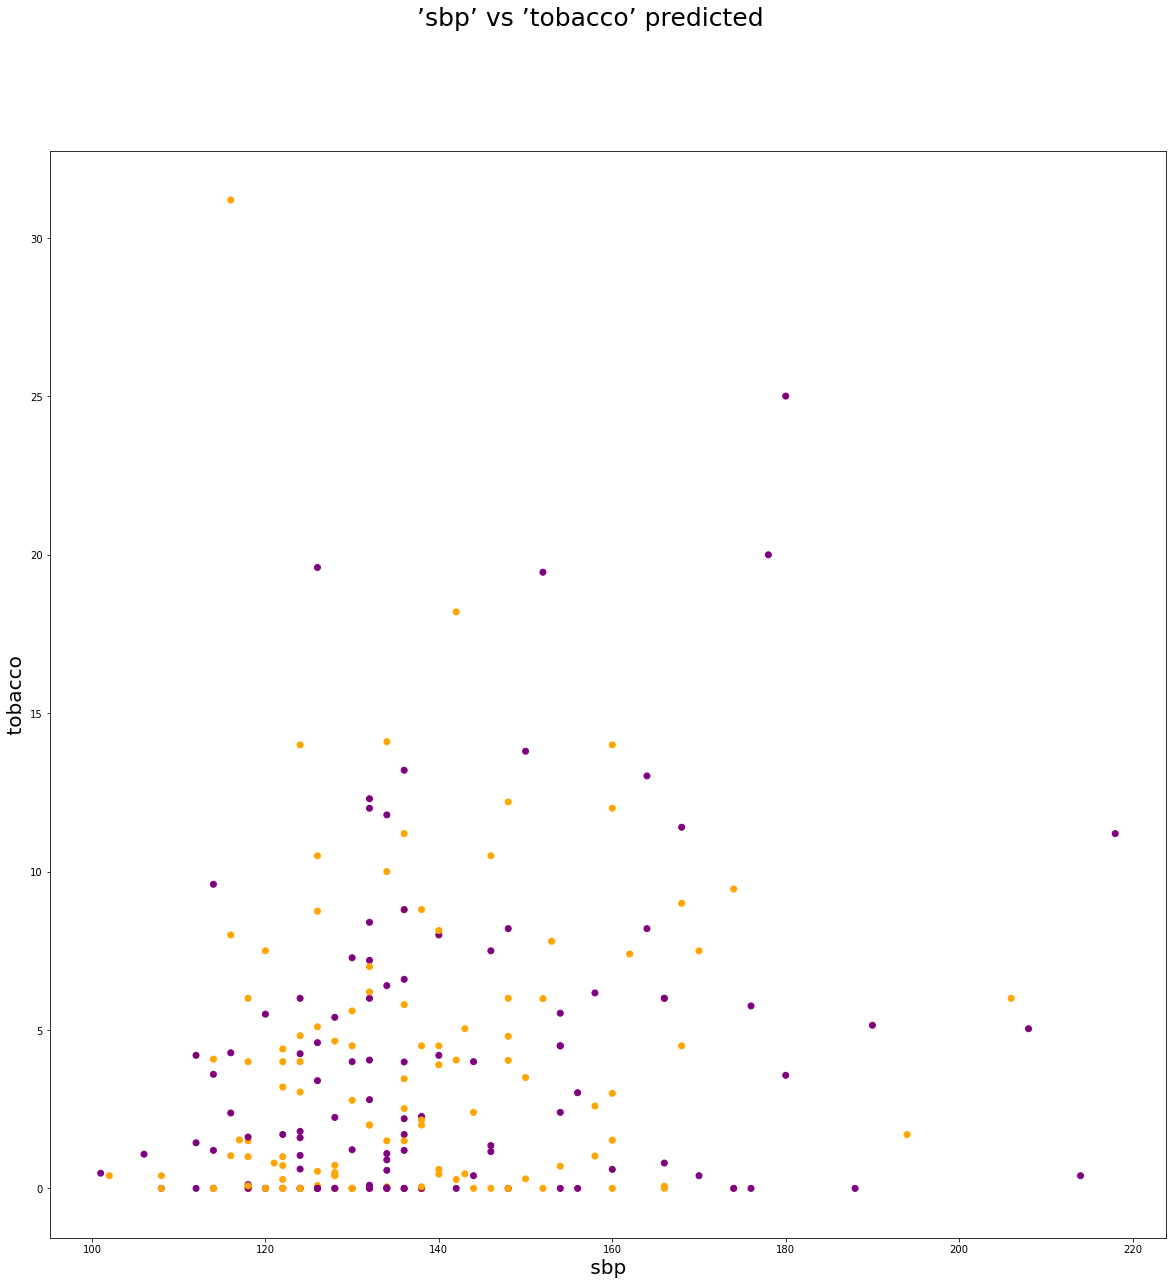

In [10]:
fig2 = plt.figure(2, figsize=(20,20))
fig2.suptitle(" ’sbp’ vs ’tobacco’ predicted ", fontsize=25)
chart2 = fig2.add_subplot()
chart2.scatter(X_test['sbp'], X_test['tobacco'], c= y_predict ,cmap= colors.ListedColormap(['purple', 'orange']))
# chart2.scatter([x for x in range(len(y))],y,color='black')
plt.xlabel(" sbp ", fontsize=20)
plt.ylabel(" tobacco ", fontsize=20)
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.5, random_state=42)
# print(X_train)
# print(X_train.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=10, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(500, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(500,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))


model.compile(optimizer='adam', loss= tf.keras.losses.binary_crossentropy, metrics= [tf.keras.metrics.BinaryCrossentropy()]) 

model.fit(pd.DataFrame(X_train),pd.DataFrame( y_train), epochs=35, batch_size=12)

Y_pred = model.predict(X_test)

Epoch 1/35
20/20 [==============================] - 0s 3ms/step - loss: 0.6942 - binary_crossentropy: 0.6942
Epoch 2/35
20/20 [==============================] - 0s 2ms/step - loss: 0.6980 - binary_crossentropy: 0.6980
Epoch 3/35
20/20 [==============================] - 0s 3ms/step - loss: 0.6933 - binary_crossentropy: 0.6933
Epoch 4/35
20/20 [==============================] - 0s 3ms/step - loss: 0.6946 - binary_crossentropy: 0.6946
Epoch 5/35
20/20 [==============================] - 0s 2ms/step - loss: 0.6932 - binary_crossentropy: 0.6932
Epoch 6/35
20/20 [==============================] - 0s 2ms/step - loss: 0.6937 - binary_crossentropy: 0.6937
Epoch 7/35
20/20 [==============================] - 0s 2ms/step - loss: 0.6932 - binary_crossentropy: 0.6932
Epoch 8/35
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_crossentropy: 0.6931
Epoch 9/35
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_crossentropy: 0.6931
Epoch 10/35
20/20 [

In [14]:

Y_predict = []
for i in range(len(Y_pred)):
    if Y_pred[i][1] >= 0.5:
        Y_predict.append(1)
    else:
        Y_predict.append(0)
# print(len(Y_predict))
# print(len(y_test))

counter = 0
for i in range(len(Y_predict)):
    if Y_predict[i] == list(y_test)[i]:
        counter+=1
accu = counter / len(Y_predict)
print (accu)


0.645021645021645


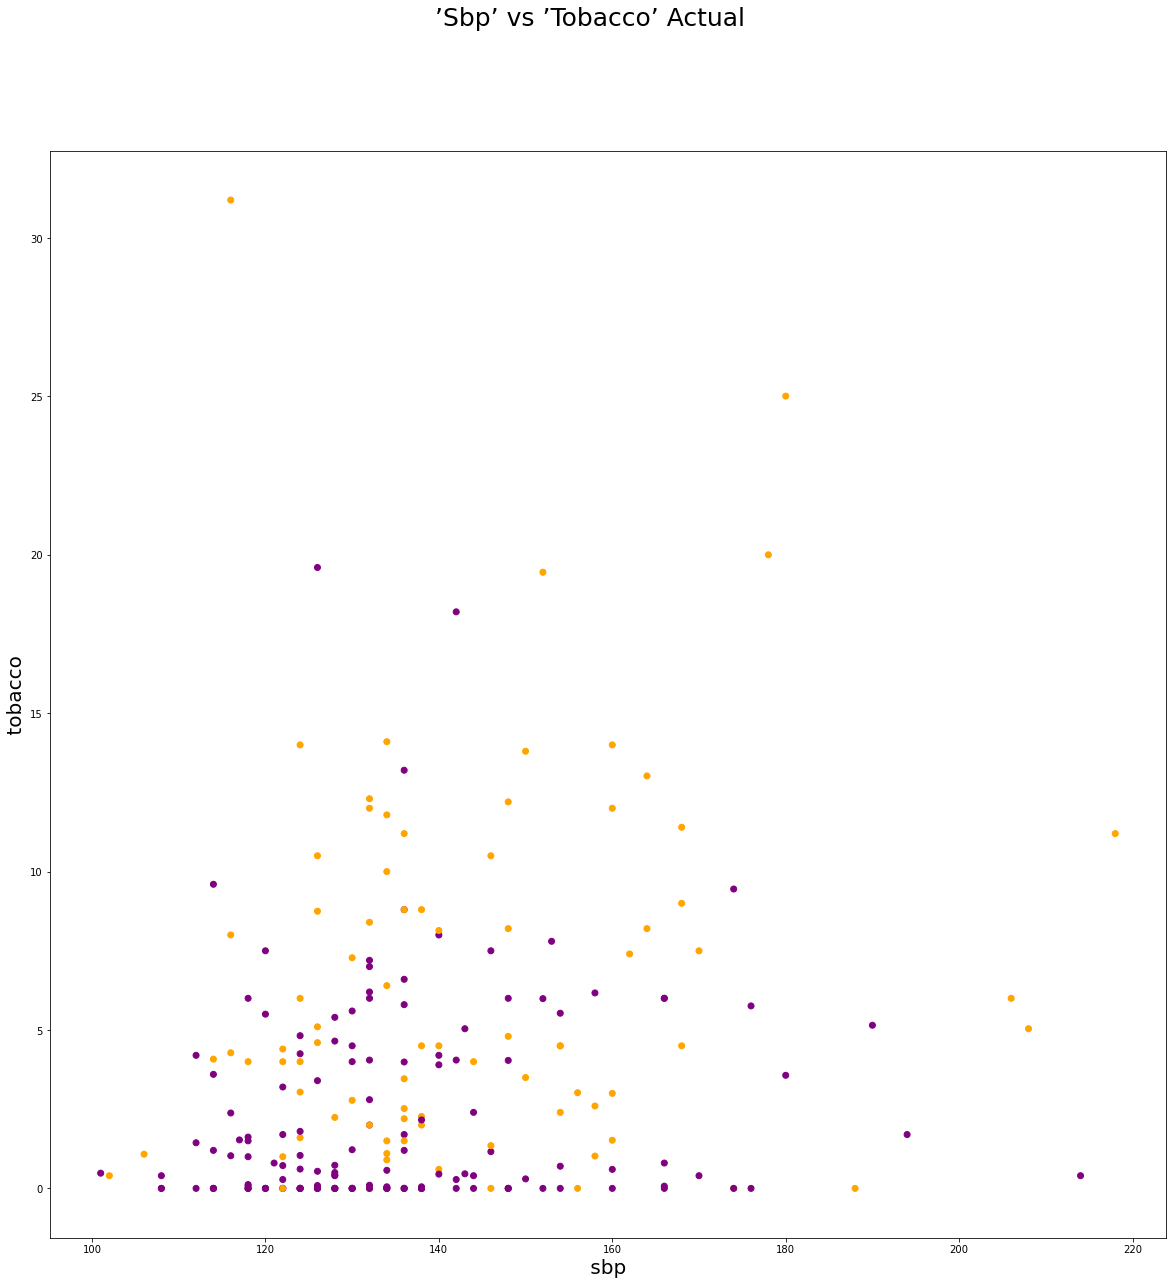

In [15]:
fig3 = plt.figure(3, figsize=(20,20))
fig3.suptitle(" ’Sbp’ vs ’Tobacco’ Actual ", fontsize=25)
chart3 = fig3.add_subplot()
chart3.scatter(X_test['sbp'], X_test['tobacco'], c= y_test ,cmap= colors.ListedColormap(['purple', 'orange']))
# chart3.scatter([x for x in range(len(y_test))],y_test)
plt.xlabel(" sbp ", fontsize=20)
plt.ylabel(" tobacco ", fontsize=20)
plt.show()

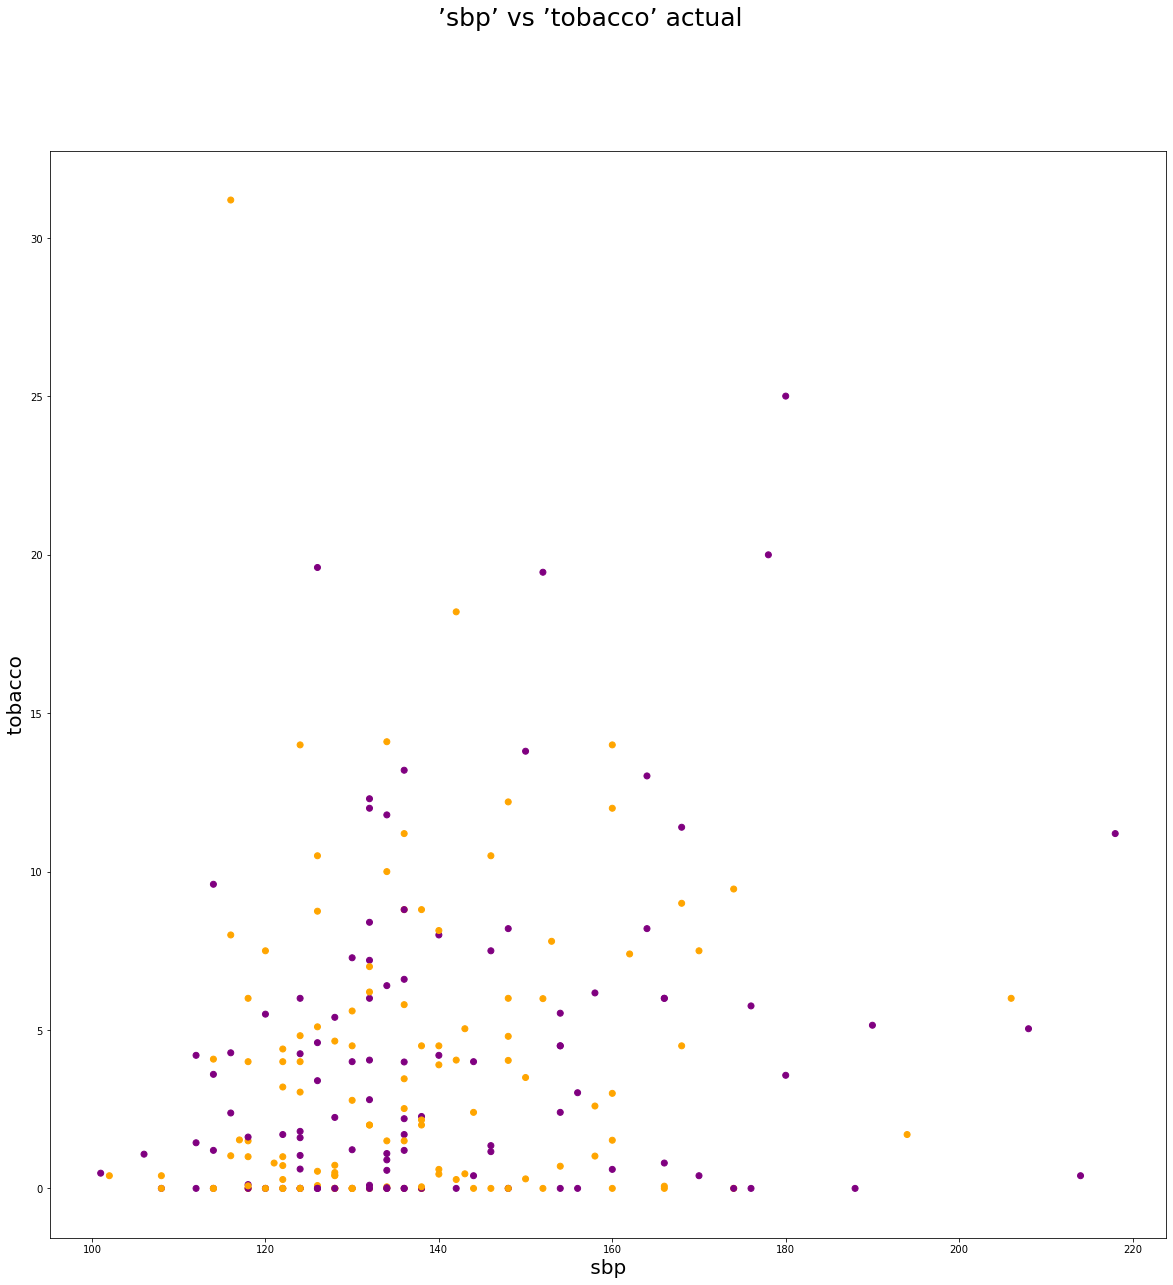

In [16]:
fig4 = plt.figure(4, figsize=(20,20))
fig4.suptitle(" ’sbp’ vs ’tobacco’ actual ", fontsize=25)
chart4 = fig4.add_subplot()
chart4.scatter(X_test['sbp'], X_test['tobacco'], c= y_predict ,cmap= colors.ListedColormap(['purple', 'orange']))
# chart4.scatter([x for x in range(len(Y_predict))],Y_predict,color='purple')
plt.xlabel(" sbp ", fontsize=20)
plt.ylabel(" tobacco ", fontsize=20)
plt.show()

In [21]:
del data['row.names']
print(data)

     sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age
0    160    12.00   5.73      23.11        1     49    25.30    97.20   52
1    144     0.01   4.41      28.61        2     55    28.87     2.06   63
2    118     0.08   3.48      32.28        1     52    29.14     3.81   46
3    170     7.50   6.41      38.03        1     51    31.99    24.26   58
4    134    13.60   3.50      27.78        1     60    25.99    57.34   49
..   ...      ...    ...        ...      ...    ...      ...      ...  ...
457  214     0.40   5.98      31.72        2     64    28.45     0.00   58
458  182     4.20   4.41      32.10        2     52    28.61    18.72   52
459  108     3.00   1.59      15.23        2     40    20.09    26.64   55
460  118     5.40  11.61      30.79        2     64    27.35    23.97   40
461  132     0.00   4.82      33.41        1     62    14.70     0.00   46

[462 rows x 9 columns]


In [30]:
from sklearn.decomposition import PCA


x_scaled = MinMaxScaler().fit_transform(data)


pca = PCA(0.9)

pca.fit(x_scaled)

pca_values = pca.transform(x_scaled)
print(pca.explained_variance_ratio_)


[0.49694113 0.22785574 0.06422651 0.05648991 0.04560454 0.0408401 ]


In [39]:
print(pca_values)
principalDf = pd.DataFrame(data = pca_values, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])
print(principalDf)

[[ 0.64158568 -0.050027    0.29395821  0.49338432 -0.02666862  0.10423281]
 [-0.27551928 -0.46636785  0.05260478 -0.17066547 -0.01352836 -0.08296679]
 [ 0.57590998  0.11834464 -0.14274241 -0.15482644 -0.07034466  0.12706628]
 ...
 [-0.41694565 -0.05749502  0.47685413 -0.15564136 -0.14046611  0.19471728]
 [-0.35220656 -0.2098147  -0.30522355  0.00782019 -0.2915786  -0.02726887]
 [ 0.56888791  0.15162001 -0.00689789 -0.14972426 -0.05641243 -0.09655735]]
     principal component 1  principal component 2  principal component 3  \
0                 0.641586              -0.050027               0.293958   
1                -0.275519              -0.466368               0.052605   
2                 0.575910               0.118345              -0.142742   
3                 0.732808              -0.343700              -0.129535   
4                 0.615057               0.020039               0.150837   
..                     ...                    ...                    ...   
457         

In [40]:
#Part B KMeans Clustering
X_train, X_test, y_train, y_test = train_test_split(principalDf, list(y), test_size=0.5, random_state=42)

km = KMeans(n_clusters=2, random_state=42)
km.fit(X_train,y_train)
y_predict = km.predict(X_test)

# print(y_predict)
# print(len(y_test))

counter = 0
for i in range(len(y_predict)):
    if y_predict[i] == y_test[i]:
        counter+=1
accu = counter / len(y_predict)
print (accu)

0.6623376623376623


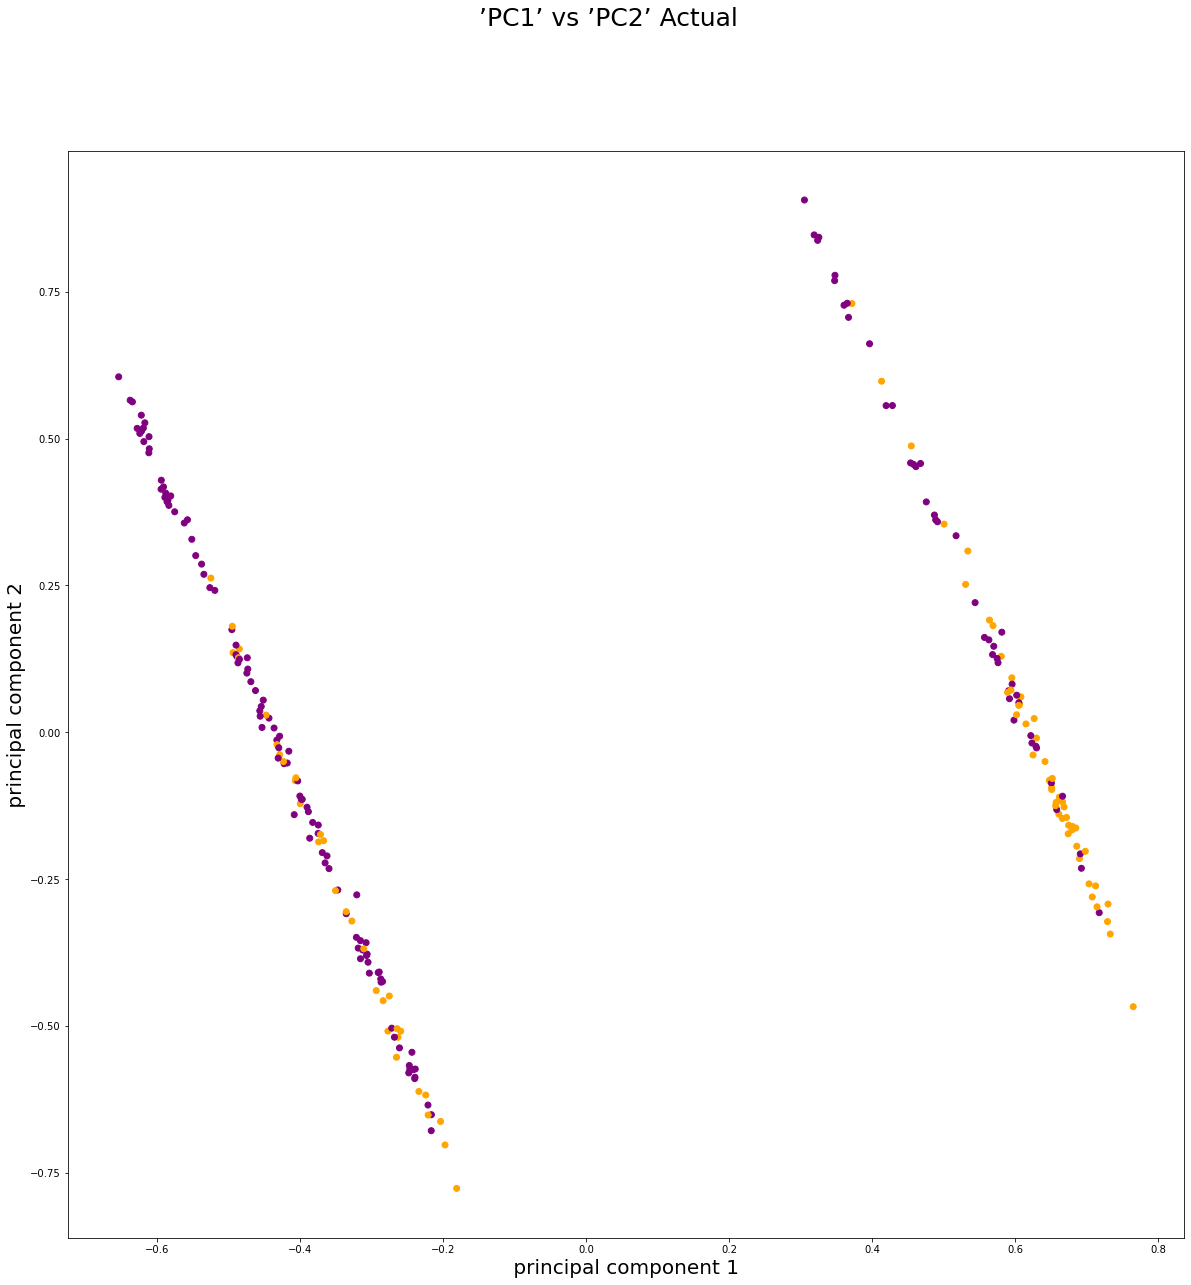

In [48]:
fig5 = plt.figure(5, figsize=(20,20))
fig5.suptitle(" ’PC1’ vs ’PC2’ Actual ", fontsize=25)
chart5 = fig5.add_subplot()
chart5.scatter(X_test['principal component 1'], X_test['principal component 2'], c= y_test ,cmap= colors.ListedColormap(['purple', 'orange']))
# chart1.scatter([x for x in range(len(y))],y)
plt.xlabel(" principal component 1 ", fontsize=20)
plt.ylabel(" principal component 2 ", fontsize=20)
plt.show()

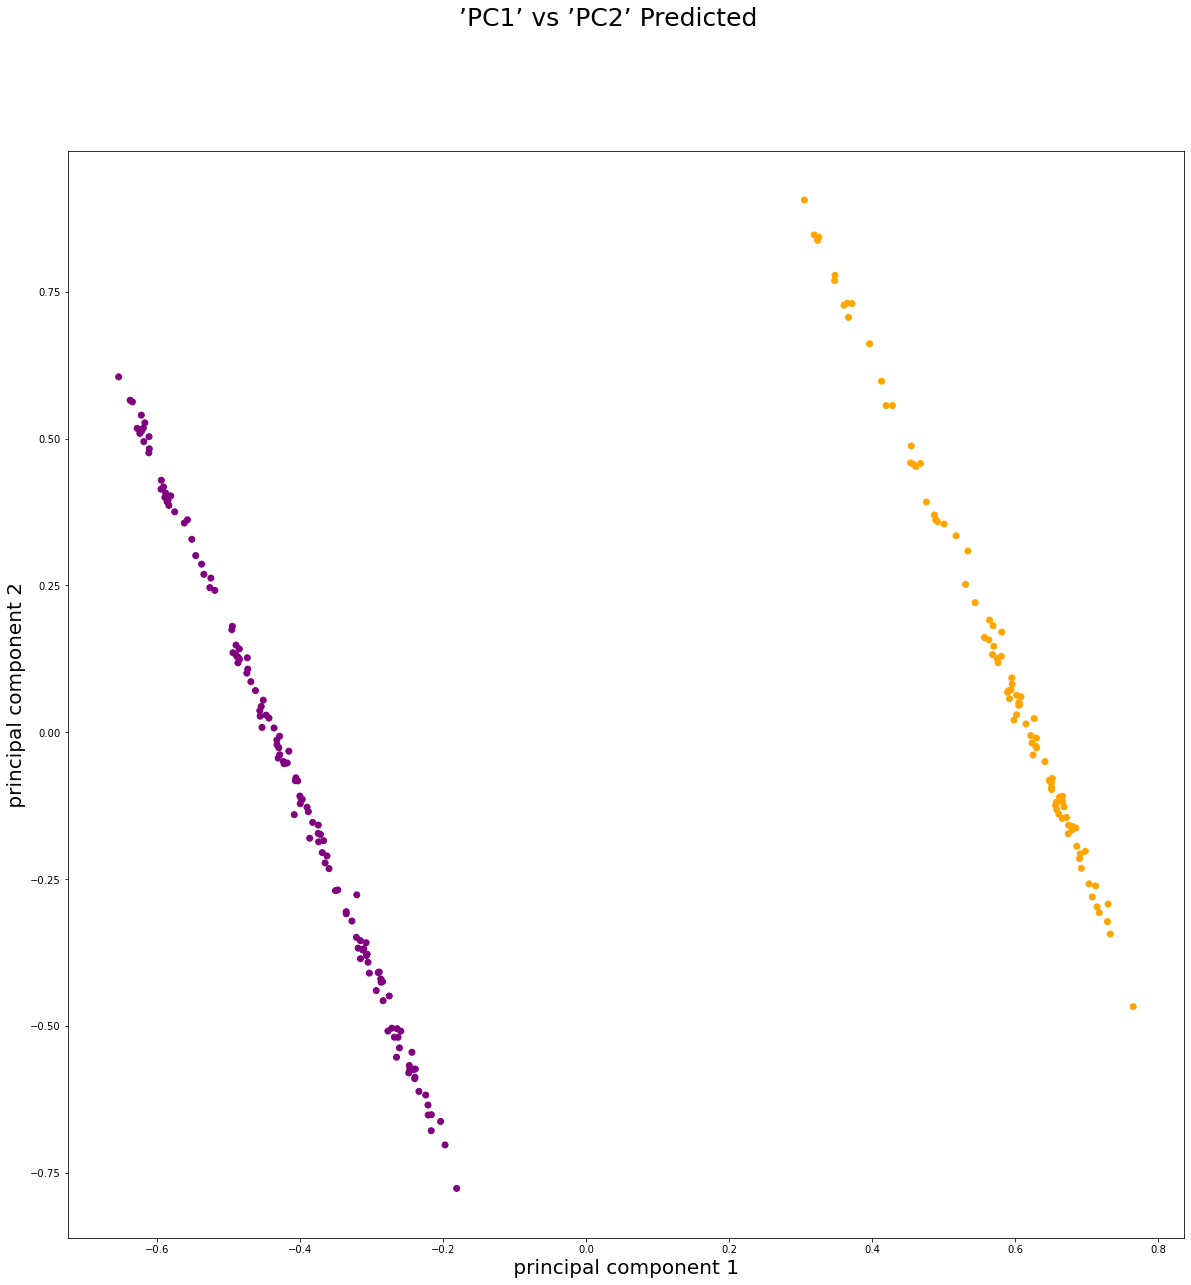

In [49]:
fig6 = plt.figure(6, figsize=(20,20))
fig6.suptitle(" ’PC1’ vs ’PC2’ Predicted ", fontsize=25)
chart6 = fig6.add_subplot()
chart6.scatter(X_test['principal component 1'], X_test['principal component 2'], c= y_predict ,cmap= colors.ListedColormap(['purple', 'orange']))
# chart2.scatter([x for x in range(len(y))],y,color='black')
plt.xlabel(" principal component 1 ", fontsize=20)
plt.ylabel(" principal component 2 ", fontsize=20)
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, list(y), test_size=0.5, random_state=42)

# print(X_train)
# print(X_train.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=6, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(500, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(500,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))


model.compile(optimizer='adam', loss= tf.keras.losses.binary_crossentropy, metrics= [tf.keras.metrics.BinaryCrossentropy()]) 

model.fit(pd.DataFrame(X_train),pd.DataFrame(y_train), epochs=35, batch_size=12)

Y_pred = model.predict(X_test)

Epoch 1/35
20/20 [==============================] - 0s 2ms/step - loss: 0.6932 - binary_crossentropy: 0.6932
Epoch 2/35
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_crossentropy: 0.6931
Epoch 3/35
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_crossentropy: 0.6931
Epoch 4/35
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_crossentropy: 0.6931
Epoch 5/35
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_crossentropy: 0.6931
Epoch 6/35
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_crossentropy: 0.6931
Epoch 7/35
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_crossentropy: 0.6931
Epoch 8/35
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_crossentropy: 0.6931
Epoch 9/35
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_crossentropy: 0.6931
Epoch 10/35
20/20 [

In [59]:
print(Y_pred)

[[0.5000025  0.49999753]
 [0.5000003  0.49999976]
 [0.5000012  0.4999988 ]
 [0.49999487 0.5000052 ]
 [0.5000031  0.4999969 ]
 [0.5000012  0.4999988 ]
 [0.5000014  0.4999987 ]
 [0.5000012  0.4999988 ]
 [0.5000012  0.4999988 ]
 [0.5000012  0.4999988 ]
 [0.5000012  0.4999988 ]
 [0.5000016  0.4999984 ]
 [0.49998933 0.50001067]
 [0.5000029  0.49999705]
 [0.50000054 0.4999995 ]
 [0.5000112  0.49998885]
 [0.500011   0.499989  ]
 [0.5000012  0.4999988 ]
 [0.49999887 0.5000012 ]
 [0.5000012  0.4999988 ]
 [0.5000012  0.4999988 ]
 [0.5000012  0.4999988 ]
 [0.50000393 0.49999604]
 [0.5000012  0.4999988 ]
 [0.49999493 0.50000507]
 [0.5000012  0.4999988 ]
 [0.49999613 0.50000393]
 [0.5000012  0.4999988 ]
 [0.5000012  0.4999988 ]
 [0.5000012  0.4999988 ]
 [0.5000058  0.4999942 ]
 [0.49999836 0.5000016 ]
 [0.5000012  0.4999988 ]
 [0.5000011  0.49999893]
 [0.50000226 0.4999978 ]
 [0.500001   0.49999905]
 [0.5000053  0.49999472]
 [0.4999969  0.50000316]
 [0.5000012  0.4999988 ]
 [0.5000012  0.4999988 ]


In [60]:
Y_predict = []
for i in range(len(Y_pred)):
    if Y_pred[i][1] >= 0.5:
        Y_predict.append(1)
    else:
        Y_predict.append(0)
# print(len(Y_predict))
# print(len(y_test))

counter = 0
for i in range(len(Y_predict)):
    if Y_predict[i] == list(y_test)[i]:
        counter+=1
accu = counter / len(Y_predict)
print (accu)


0.5411255411255411


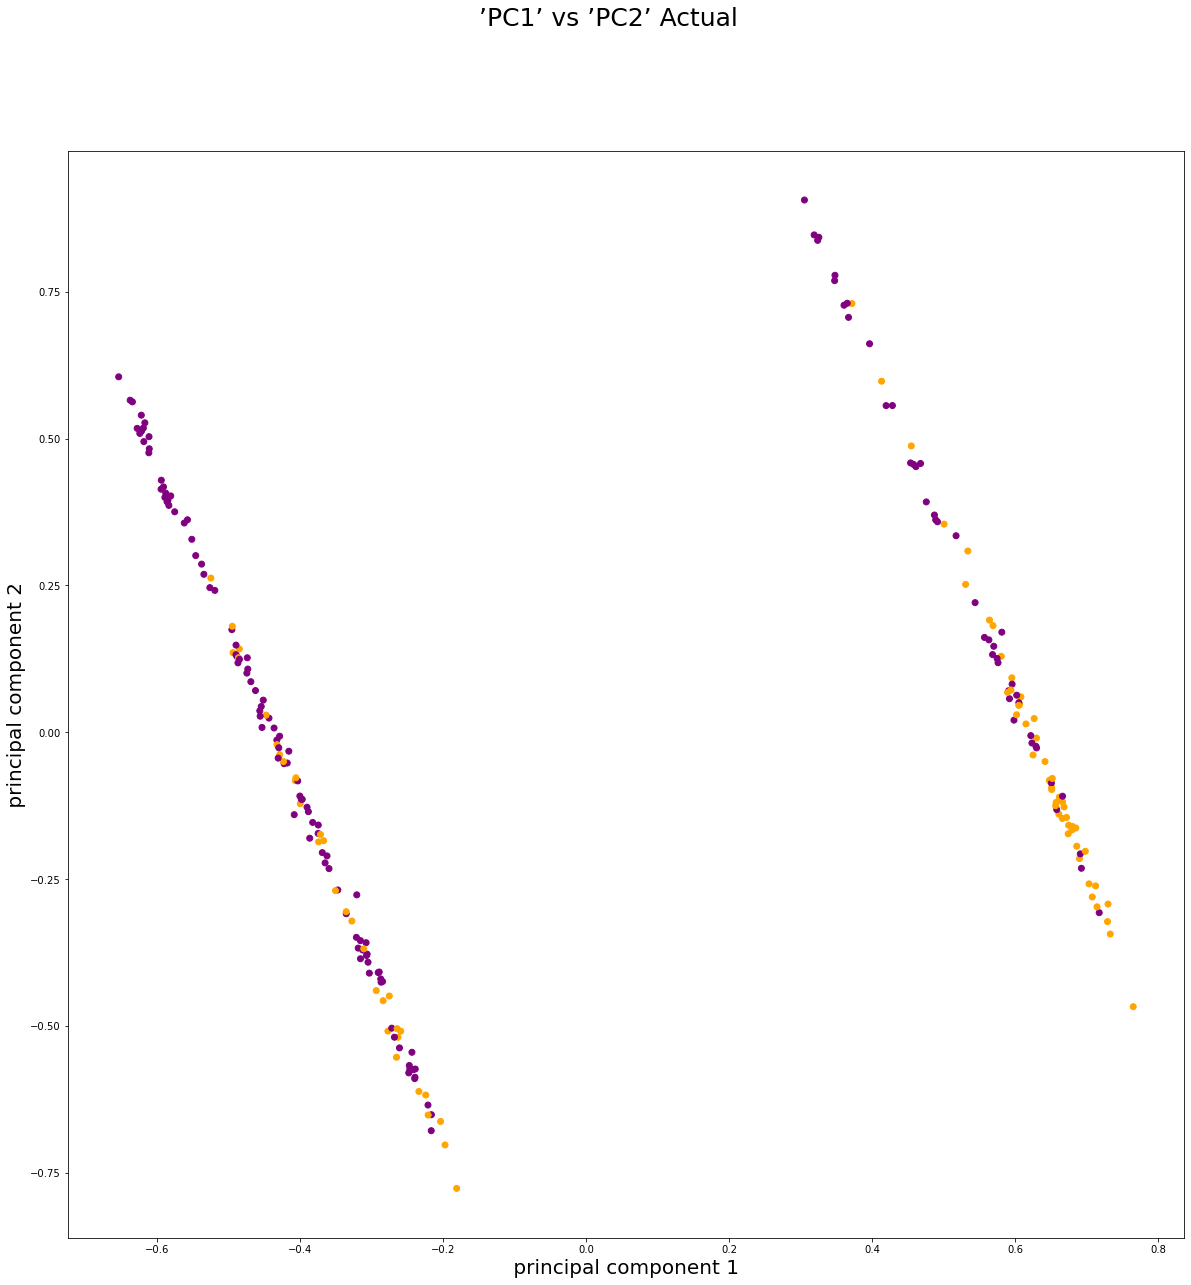

In [62]:
fig7 = plt.figure(7, figsize=(20,20))
fig7.suptitle(" ’PC1’ vs ’PC2’ Actual ", fontsize=25)
chart7 = fig7.add_subplot()
chart7.scatter(X_test['principal component 1'], X_test['principal component 2'], c= y_test ,cmap= colors.ListedColormap(['purple', 'orange']))
# chart3.scatter([x for x in range(len(y_test))],y_test)
plt.xlabel(" principal component 1 ", fontsize=20)
plt.ylabel(" principal component 2 ", fontsize=20)
plt.show()

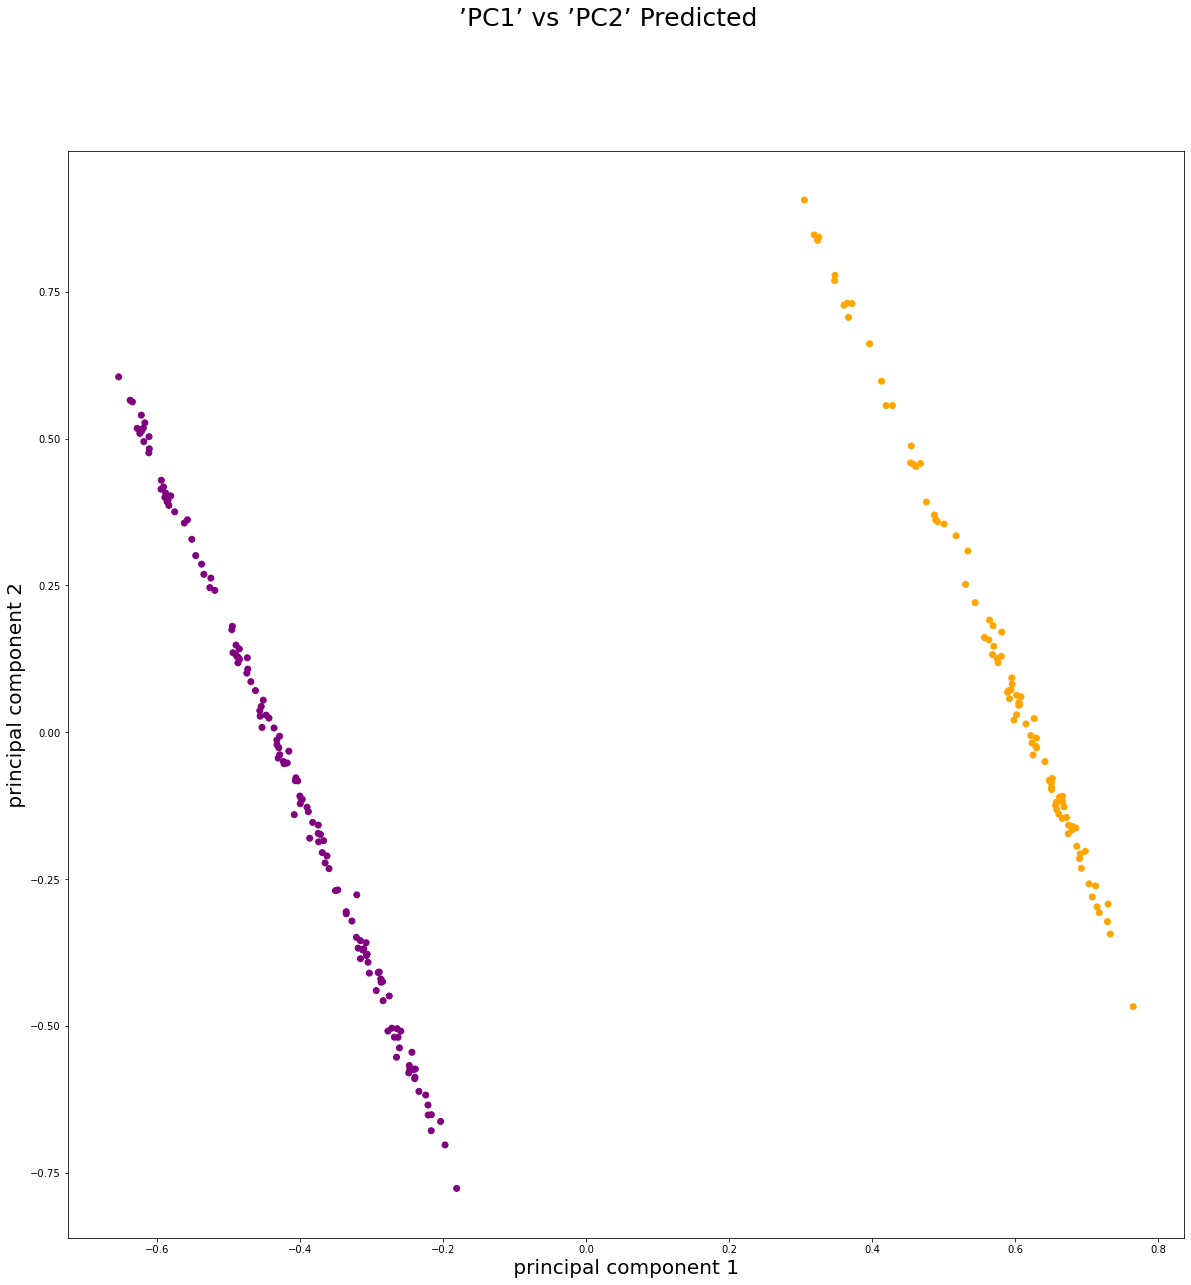

In [63]:
fig8 = plt.figure(8, figsize=(20,20))
fig8.suptitle(" ’PC1’ vs ’PC2’ Predicted ", fontsize=25)
chart8 = fig8.add_subplot()
chart8.scatter(X_test['principal component 1'], X_test['principal component 2'], c= y_predict ,cmap= colors.ListedColormap(['purple', 'orange']))
# chart4.scatter([x for x in range(len(Y_predict))],Y_predict,color='purple')
plt.xlabel(" principal component 1 ", fontsize=20)
plt.ylabel(" principal component 2 ", fontsize=20)
plt.show()

In [70]:
from sklearn.linear_model import LogisticRegression

x_scaled = MinMaxScaler().fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, list(y), test_size=0.5, random_state=42)

logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

y_predict = logisticRegr.predict(X_test)

counter = 0
for i in range(len(y_predict)):
    if y_predict[i] == list(y_test)[i]:
        counter+=1
accu = counter / len(y_predict)
print (accu)

0.7662337662337663


In [71]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, list(y), test_size=0.5, random_state=42)

logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

y_predict = logisticRegr.predict(X_test)

counter = 0
for i in range(len(y_predict)):
    if y_predict[i] == list(y_test)[i]:
        counter+=1
accu = counter / len(y_predict)
print (accu)

0.7532467532467533
